# Computer Vision: Part 0- Handling image data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from PIL import Image

## Compress image with PCA

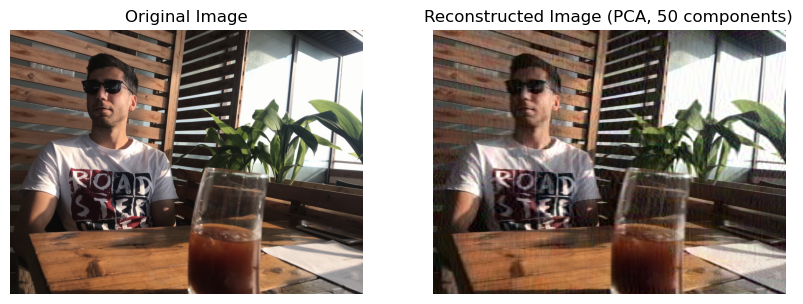

size of the image before compression: (2880, 1280)
size of the image after compression: (2880, 50)


In [2]:
# Import image
im = Image.open('3.jpg')
img = np.array(im)

# Flatten the image into a 2D array
rows, cols, channels = img.shape
flat_img = img.reshape(rows * channels, cols)

# Standardize the data
scaler = StandardScaler()
flat_img_std = scaler.fit_transform(flat_img)

# Apply PCA
n_components = 50  # Number of principal components to keep
pca = PCA(n_components=n_components)
flat_img_pca = pca.fit_transform(flat_img_std)

# Reconstruct the image
flat_img_reconstructed = pca.inverse_transform(flat_img_pca)
flat_img_reconstructed = scaler.inverse_transform(flat_img_reconstructed)

# Reshape the reconstructed image back to its original shape
reconstructed_img = flat_img_reconstructed.reshape(rows, cols, channels)

# Clip the pixel values to the valid range [0, 255]
reconstructed_img = np.clip(reconstructed_img, 0, 255).astype(np.uint8)

# Visualize the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(im)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image (PCA, {n_components} components)')
plt.imshow(reconstructed_img)
plt.axis('off')
plt.show()

print(f'size of the image before compression: {flat_img.shape}')
print(f'size of the image after compression: {flat_img_pca.shape}')

## PIL
### Handle images with PIL library

In [3]:
from PIL import ImageOps

### Create gray image

In [4]:
gray = ImageOps.grayscale(im)
gray.save('gray.png')          # Save the image

### Reduce pixel differences

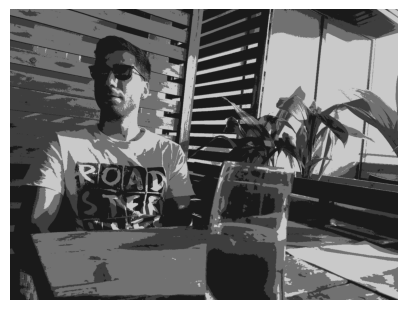

In [32]:
# Quantize pixels to have just 4 unique values
q = gray.quantize(4)

plt.figure(figsize=(5,5))
plt.imshow(q)
plt.axis('off');

### Split channels

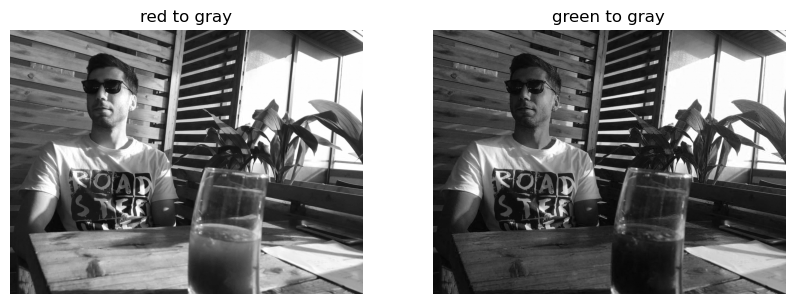

In [7]:
# Split each channel and make gray seperately
red, blue, green = im.split()
gray_r = ImageOps.grayscale(red)
gray_g = ImageOps.grayscale(green)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('red to gray')
plt.imshow(gray_r, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('green to gray')
plt.imshow(gray_g, cmap='gray')
plt.axis('off')
plt.show()

### Flip images

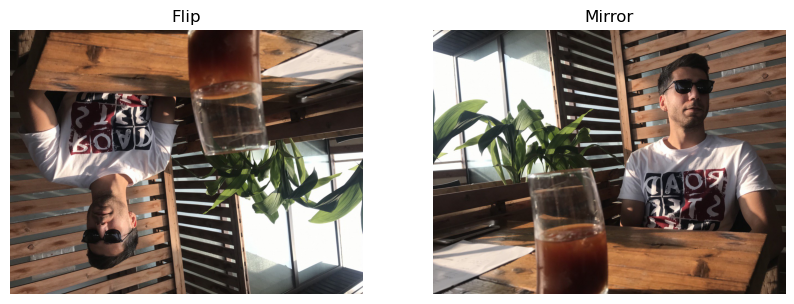

In [25]:
im_flip = ImageOps.flip(im)                           # flip the object
im_mirror = ImageOps.mirror(im)                       # mirror the object
im_transpose = im.transpose(Image.FLIP_TOP_BOTTOM)    # transpose the object

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Flip')
plt.imshow(im_flip)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Mirror')
plt.imshow(im_mirror)
plt.axis('off')
plt.show()

### Draw on image

In [29]:
from PIL import ImageDraw

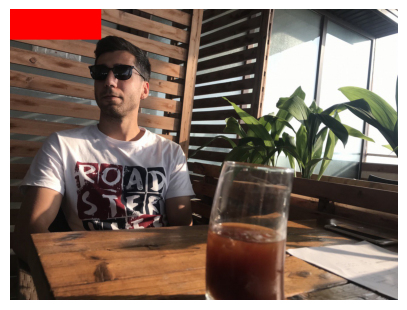

In [40]:
pic = im.copy()
ImageDraw.Draw(im=pic).rectangle(xy=[0,0,300,100], fill='red')

plt.figure(figsize=(5,5))
plt.imshow(pic)
plt.axis('off');

### Text on image

In [36]:
from PIL import ImageFont

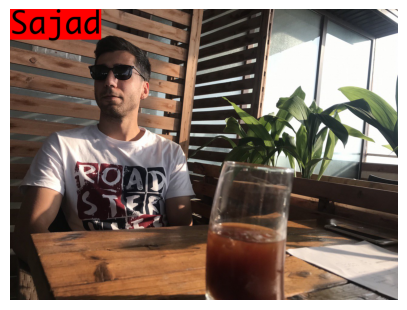

In [41]:
fnt = ImageFont.truetype('Monaco.ttf', 100)
ImageDraw.Draw(im=pic).text(xy=(0,0), text='Sajad', font=fnt, fill=(0,0,0))

plt.figure(figsize=(5,5))
plt.imshow(pic)
plt.axis('off');

### Geometric operations
#### Scale

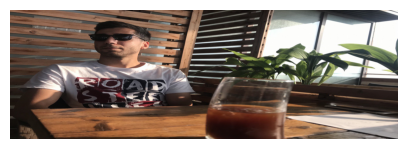

In [51]:
im_scaled = im.resize((1200,400))      # Scale the image with new width and height

plt.figure(figsize=(5,5))
plt.imshow(im_scaled)
plt.axis('off');

#### Rotate

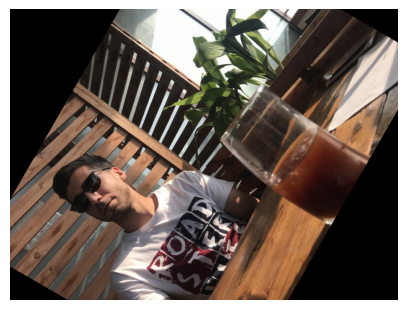

In [52]:
im_rotated = im.rotate(60)             # Rotate the image with the theta value

plt.figure(figsize=(5,5))
plt.imshow(im_rotated)
plt.axis('off');

## OpenCV
### Handle images with cv2 library

In [8]:
import cv2 as cv

(960, 1280, 3)


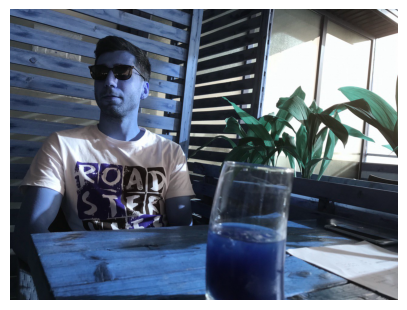

In [42]:
image = cv.imread('3.jpg')
print(image.shape)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off');

#### The colors apear off! reason: PIL is RGB but OpenCV is BGR.

### Convert the color

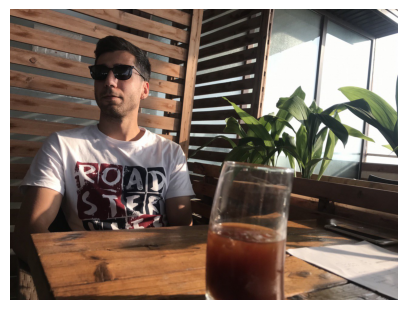

In [43]:
new_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)      # Convert the color from BGR to RGB

plt.figure(figsize=(5,5))
plt.imshow(new_image)
plt.axis('off');

### Create gray image

In [14]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)   # Convert the image BGR to Gray
cv.imwrite('gray_cv.jpg', gray_image)      # Save image
read_gray = cv.imread('3.jpg', cv.IMREAD_GRAYSCALE)  # Read image gray

### Split channels

In [24]:
blue, green, red = image[::1], image[::2], image[::3]

### Flip images

In [27]:
im_flip = cv.flip(image,0)                           # 0 for flip verticaly along y-axis
im_flip = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)  # rotate the object

### Crop

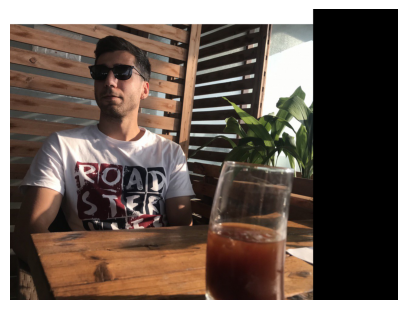

In [44]:
crop_top = new_image[150:400,:,:]       # crop 150-400 rows
crop_left = new_image[:,150:400,:]      # crop 150-400 columns
new_image[0:50,:,:] = 255
new_image[:,1000:,:] = 0

plt.figure(figsize=(5,5))
plt.imshow(new_image)
plt.axis('off');

### Draw on image

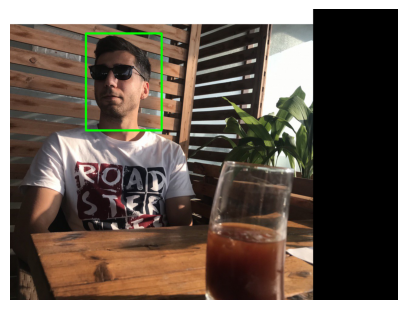

In [45]:
image_draw = np.copy(new_image)
start_point, end_point = (250,80), (500,400)
image_draw = cv.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0,255,0), thickness=5)

plt.figure(figsize=(5,5))
plt.imshow(image_draw)
plt.axis('off');

### Pixel transformations
#### Contras & Brightness

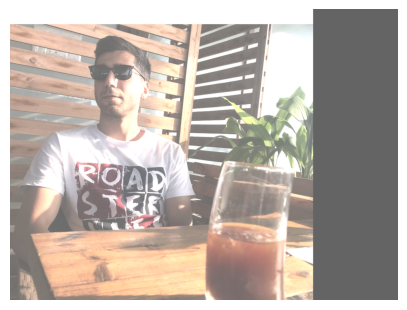

In [46]:
# Contrast & Brightness
new_im = cv.convertScaleAbs(new_image, alpha=1, beta=100)    # alpha: contrast control , beta = brightness control

plt.figure(figsize=(5,5))
plt.imshow(new_im)
plt.axis('off');

#### Threshold

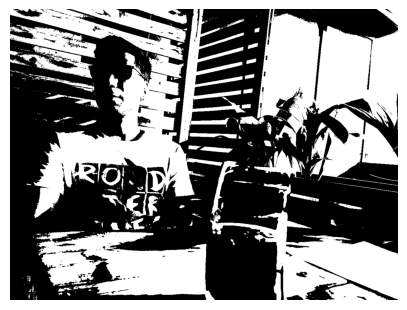

In [48]:
max_value = 255
threshold = 100
ret, ngray = cv.threshold(gray_image, threshold, max_value, cv.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(ngray, cmap='gray')
plt.axis('off');

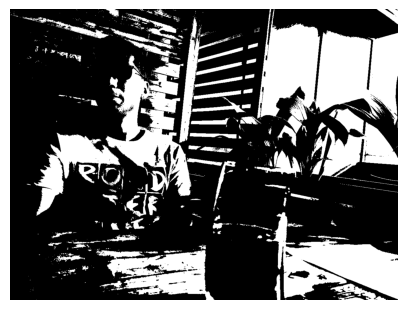

In [50]:
ret, ngray = cv.threshold(gray_image, 0, 255, cv.THRESH_OTSU)  # Set threshold auto

plt.figure(figsize=(5,5))
plt.imshow(ngray, cmap='gray')
plt.axis('off');

### Geometric operations
#### Scale

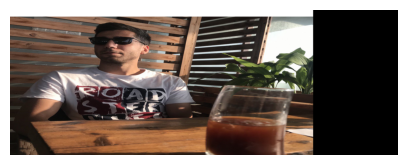

In [54]:
scaled_img = cv.resize(new_image, None, fx=2, fy=1, interpolation = cv.INTER_CUBIC)   # Scale img with fx & fy parameters

plt.figure(figsize=(5,5))
plt.imshow(scaled_img)
plt.axis('off');

#### Shift

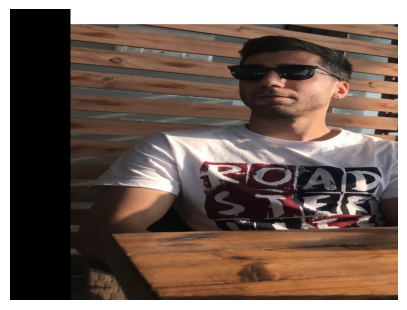

In [55]:
rows, cols, _ = image.shape
tx = 200      # number of pixels to shift in the horizontal direction
ty = 0        # number of pixels to shift in the vertical direction
M = np.float32([[2,0,tx], [0,1,ty]])      # shif in the horizontal direction with scaling
img_trans = cv.warpAffine(new_image, M, (cols,rows))

plt.figure(figsize=(5,5))
plt.imshow(img_trans)
plt.axis('off');

### Filtering

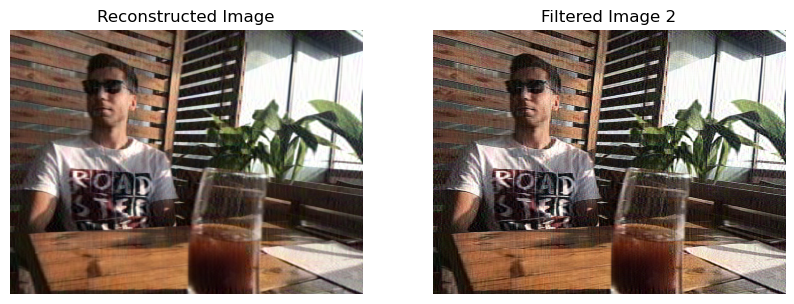

In [56]:
# Filter 1
kernel = np.ones((10,10))/100         # Filter structure
filtered_img = cv.filter2D(src=reconstructed_img, ddepth=-1, kernel=kernel)
# Filter2
kernel2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
filtered_img2 = cv.filter2D(src=reconstructed_img, ddepth=-1, kernel=kernel2)

# Visualize the reconstructed and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtered Image 2')
plt.imshow(filtered_img2)
plt.axis('off')
plt.show()

### Edges

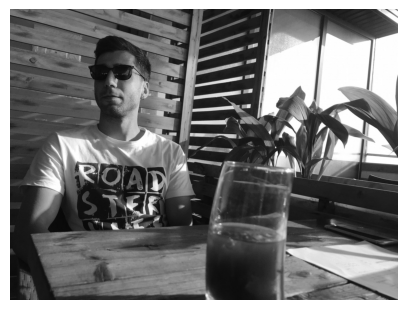

In [57]:
gray_edge = cv.GaussianBlur(gray_image, (3,3), sigmaX=0.1, sigmaY=0.1)

plt.figure(figsize=(5,5))
plt.imshow(gray_edge, cmap='gray')
plt.axis('off');

### Gradians

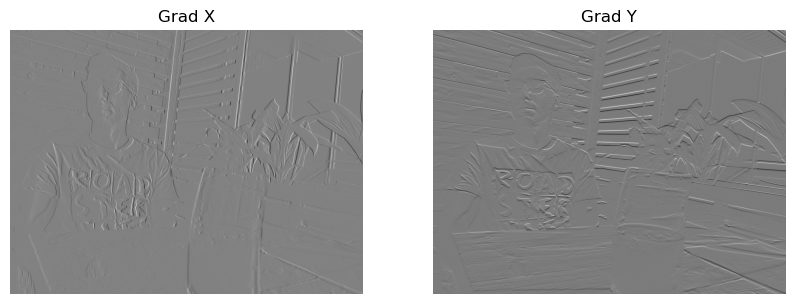

In [58]:
ddepth = cv.CV_16S
grad_x = cv.Sobel(src=gray_image, ddepth=ddepth, dx=1, dy=0, ksize=3)
grad_y = cv.Sobel(src=gray_image, ddepth=ddepth, dx=0, dy=1, ksize=3)

# Visualize the x and y gradians
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Grad X')
plt.imshow(grad_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grad Y')
plt.imshow(grad_y, cmap='gray')
plt.axis('off')
plt.show()

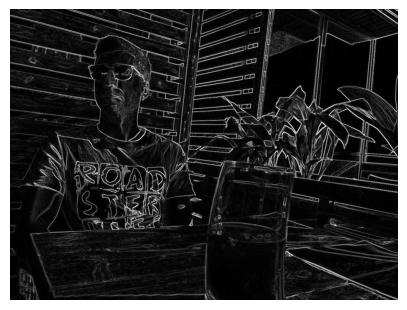

In [59]:
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.figure(figsize=(5,5))
plt.imshow(grad, cmap='gray')
plt.axis('off');